In [21]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [22]:
doge = web.DataReader('ELON-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,523817,0.000000e+00
2021-04-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51157783,0.000000e+00
2021-04-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14962631,0.000000e+00
2021-04-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,30621745,0.000000e+00
2021-04-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37492592,0.000000e+00
...,...,...,...,...,...,...
2022-04-20,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,224367601,1.000000e-06
2022-04-21,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,71395669,1.000000e-06
2022-04-22,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,45563738,1.000000e-06


In [23]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmelon.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

            High           Low          Open         Close     Volume  \
0   2.000000e-06  2.000000e-06  2.000000e-06  2.000000e-06   28411316   
1   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06    8614416   
2   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06    8764455   
3   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   15698350   
4   2.000000e-06  2.000000e-06  2.000000e-06  2.000000e-06   18802843   
5   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   23063025   
6   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   10131973   
7   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   20949400   
8   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   13373327   
9   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06    7160283   
10  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   15246592   
11  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   11656733   
12  1.000000e-06  1.000000e-06  1.000000e-06  1.000

In [24]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [25]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [26]:
n_train

40

In [27]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [28]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [29]:
X_test

array([[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 8.08436300e+06,
        9.99999997e-07, 1.41458700e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.42645400e+06,
        9.99999997e-07, 2.27658000e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.30926500e+06,
        9.99999997e-07, 1.99485454e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.24522000e+06,
        9.99999997e-07, 1.69029840e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.30700530e+07,
        9.99999997e-07, 1.31502325e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.40005620e+07,
        9.99999997e-07, 1.53586280e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.71149850e+07,
        9.99999997e-07, 1.14973180e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 2.50562370e+07,
        9.99999997e-07, 1.07060620e-01]])

In [30]:
y_test

array([9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07])

In [31]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [32]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [33]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(2, 5, 6) (2,)


In [34]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 32)             4992      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

Epoch 1/20


C:\Users\moham\AppData\Local\Temp/ipykernel_20992/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 4s 97ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 1.1185e-04 - val_mse: 1.1185e-04
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0084 - mse:

In [36]:
pred = model_lstm.predict(test_data_gen)

In [37]:
test_data_gen[0]

(array([[[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 8.08436300e+06,
          9.99999997e-07, 1.41458700e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.42645400e+06,
          9.99999997e-07, 2.27658000e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.30926500e+06,
          9.99999997e-07, 1.99485454e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.24522000e+06,
          9.99999997e-07, 1.69029840e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.30700530e+07,
          9.99999997e-07, 1.31502325e-01]],
 
        [[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.42645400e+06,
          9.99999997e-07, 2.27658000e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.30926500e+06,
          9.99999997e-07, 1.99485454e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.24522000e+06,
          9.99999997e-07, 1.69029840e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.3

In [38]:
pred

array([[-0.01493586],
       [-0.01493586],
       [-0.01493586]], dtype=float32)

In [39]:
import matplotlib.pyplot as plt

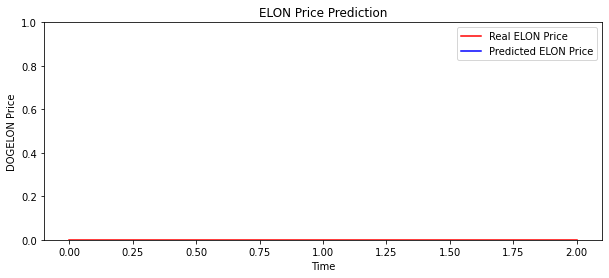

In [40]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real ELON Price')
plt.plot(pred, color = 'blue', label = 'Predicted ELON Price')
plt.title('ELON Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGELON Price')
plt.ylim(0,1)
plt.legend()
plt.show()